In [155]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#For Sampling
from sklearn.utils import resample

#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from collections import Counter
#Evaluation
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [156]:
from google.colab import drive
drive .mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [157]:
df_test=pd.read_csv('/content/drive/MyDrive/Machine Learning /aug_test.csv')
df=pd.read_csv('/content/drive/MyDrive/Machine Learning /aug_train.csv')
df_test.head()
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [158]:
df.shape

(382154, 12)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [160]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1]) 

Number of rows in Training set is =  382154  
Number of columns in Training set is =  12


In [161]:
print("Number of rows in Test set is = ", df_test.shape[0], " \nNumber of columns in Test set is = " , df_test.shape[1]) 

Number of rows in Test set is =  78273  
Number of columns in Test set is =  11


In [162]:
#Missing values analysis
df.isnull().sum().sum()

0

In [163]:
df_test.isnull().sum().sum()

0

In [164]:
#statistical analysis of numerical columns
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,22,1,7.0,1,2630.0,152.0,16,0
1,17163,42,1,28.0,0,43327.0,26.0,135,0
2,32023,66,1,33.0,0,35841.0,124.0,253,0
3,87447,22,1,33.0,0,27645.0,152.0,69,0
4,501933,28,1,46.0,1,29023.0,152.0,211,0


In [165]:
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
id,382154.000000,234392.953477,139527.487326,1.000000,115006.250000,230461.500000,345434.750000,508145.000000
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


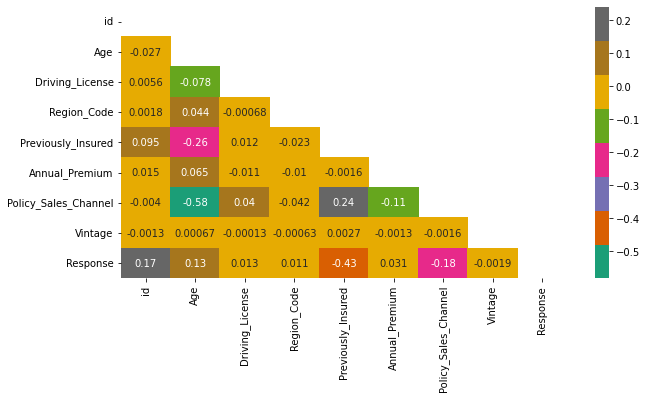

In [166]:
#Heat Map for correlation of numerical features
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

In [167]:
df.drop('id',axis=1,inplace=True)

In [168]:
#Target Analysis & Visualization
df['Response'].value_counts() 

0    319553
1     62601
Name: Response, dtype: int64

In [169]:
#Count of Class zero
Response_0 =len(df[df["Response"]==0])
Response_0

319553

In [170]:
#Count of Class One
Response_1 =len(df[df["Response"]==1])
Response_1

62601

In [171]:
Total = len(df['Response'])

In [172]:
Percentage_Response_Zero = Response_0/Total
print("Percentage of Response_Zero is    : ",Percentage_Response_Zero*100)
Percentage_Response_One = Response_1/Total
print("Percentage of Response_One is    : ",Percentage_Response_One*100)

Percentage of Response_Zero is    :  83.61890756082626
Percentage of Response_One is    :  16.381092439173734


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

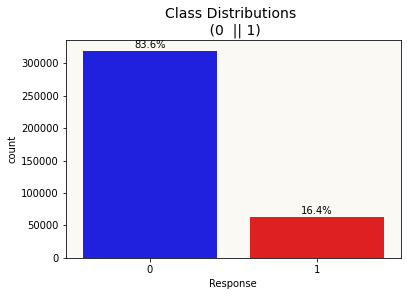

In [173]:
colors = ["blue", "red"]


ax = sns.countplot(x ='Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    ax.annotate(percentage, (x, y), ha='center', va='center')
    
plt.title('Class Distributions \n (0  || 1)', fontsize=14)

In [174]:
#Feature Visualization
def feature_plot(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x =feature,data=df, palette="cool_r")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

In [175]:
def feature_plot_with_target(feature):
    plt.figure(figsize=(10, 3))
    ax = sns.catplot(x='Response', col=feature, kind='count', data=df, palette="cool_r");
    for ax in ax.axes.ravel():
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    plt.show()

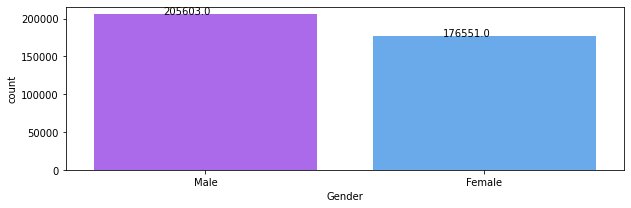

In [176]:
#Gender
feature_plot('Gender')

<Figure size 720x216 with 0 Axes>

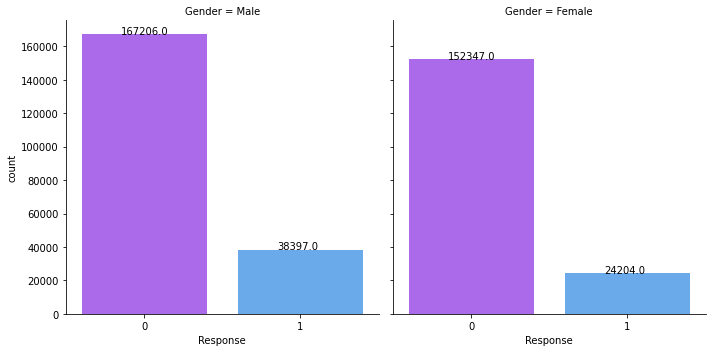

In [177]:
#Gender wrt Response
feature_plot_with_target('Gender')

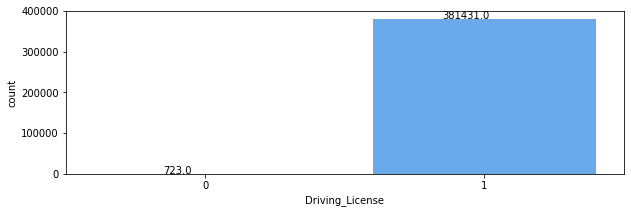

In [178]:
#Driving_License
feature_plot('Driving_License')

<Figure size 720x216 with 0 Axes>

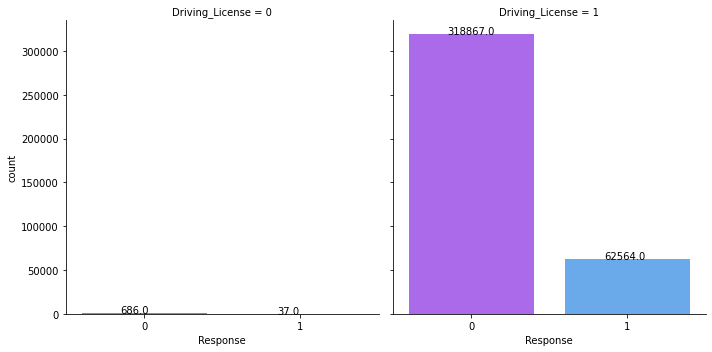

In [179]:
#Driving_License wrt Response
feature_plot_with_target('Driving_License')

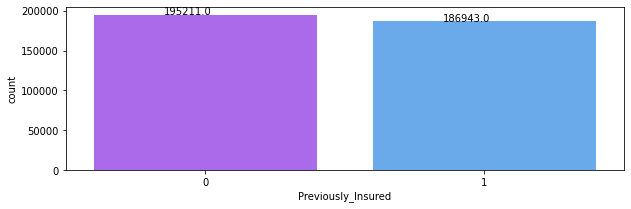

In [180]:
#Previously_Insured
feature_plot('Previously_Insured')

<Figure size 720x216 with 0 Axes>

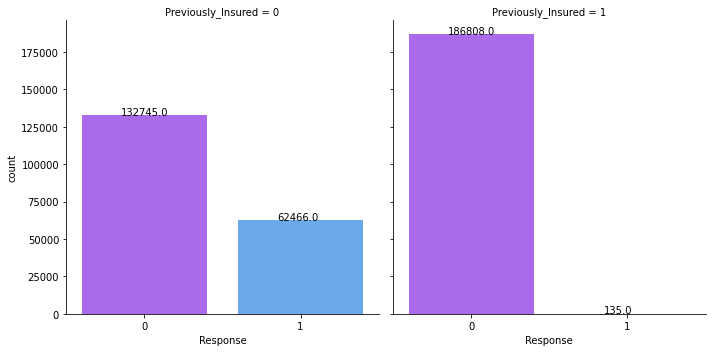

In [181]:
#Previously_Insured wrt Response
feature_plot_with_target('Previously_Insured')

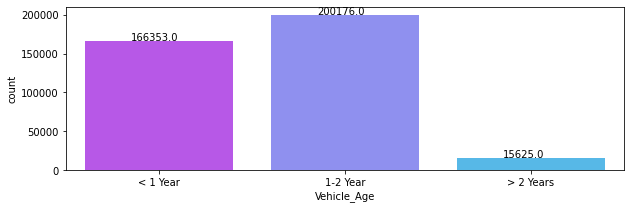

In [182]:
#Vehicle_Age
feature_plot('Vehicle_Age')

<Figure size 720x216 with 0 Axes>

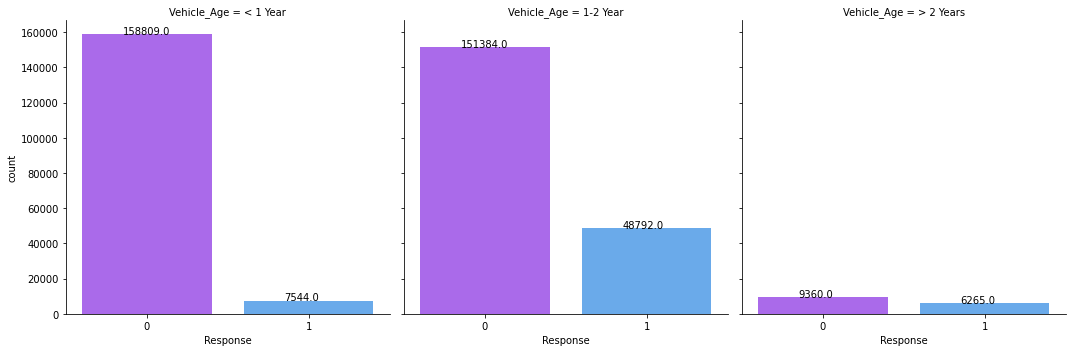

In [183]:
#Vehicle_Age wrt Response
feature_plot_with_target('Vehicle_Age')

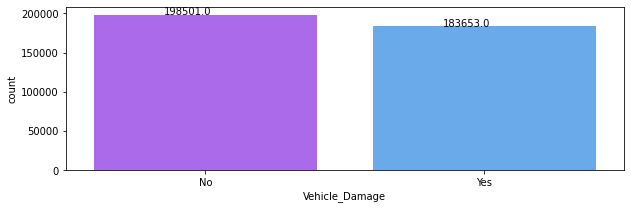

In [184]:
#Vehicle_Damage
feature_plot('Vehicle_Damage')

<Figure size 720x216 with 0 Axes>

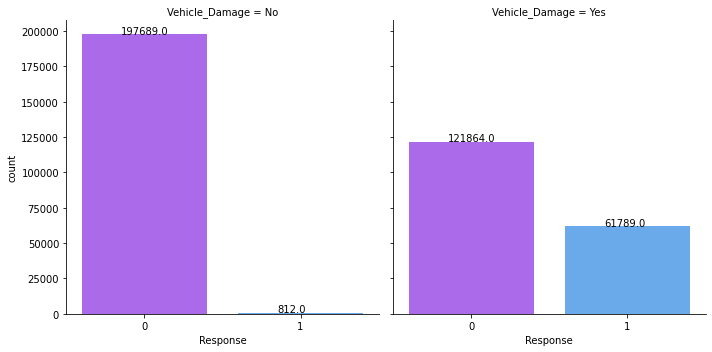

In [185]:
#Vehicle_Damage wrt Response
feature_plot_with_target('Vehicle_Damage')

In [186]:
#Age
def hist_feat(feature):
    plt.figure(figsize=(10, 3))
    sns.histplot(df[feature].dropna(),kde=True,color='purple',bins=30)

In [187]:
def dist_feat_w_target(feature):
    sns.displot(data=df, x=feature,hue='Response',kind ='kde')

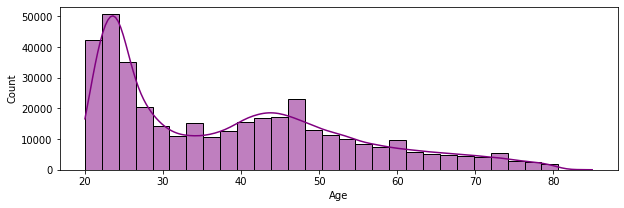

In [188]:
    hist_feat('Age')

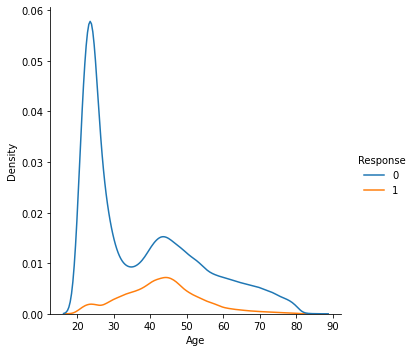

In [189]:
#Age wrt Response
dist_feat_w_target('Age')

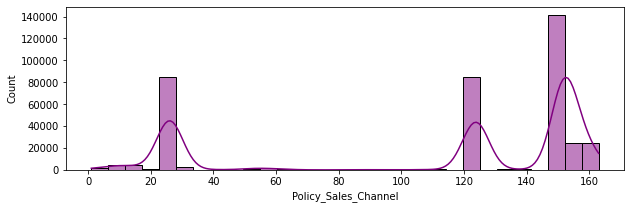

In [190]:
#Policy_Sales_Channel
hist_feat('Policy_Sales_Channel')

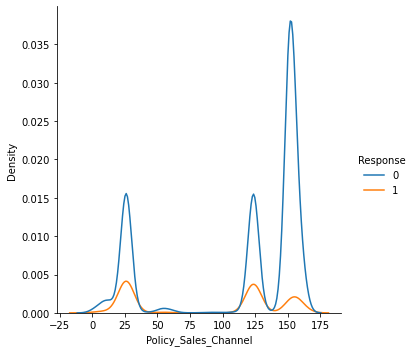

In [191]:
#Policy_Sales_Channel wrt Response
dist_feat_w_target('Policy_Sales_Channel')

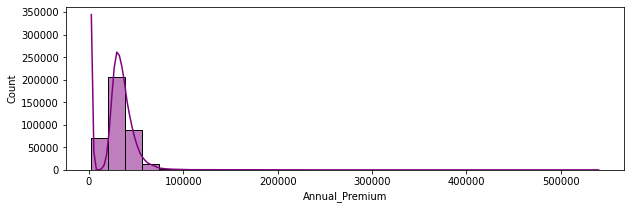

In [192]:
#Annual_Premium
hist_feat('Annual_Premium')

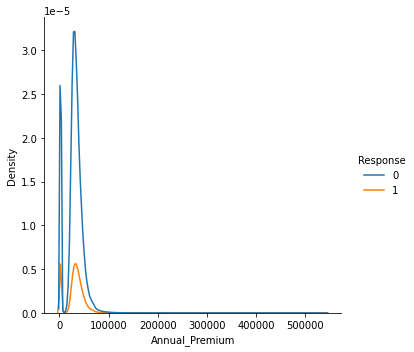

In [193]:
#Annual_Premium wrt Response
dist_feat_w_target('Annual_Premium')

Text(0.5, 1.0, 'Top 5 Region_Code ')

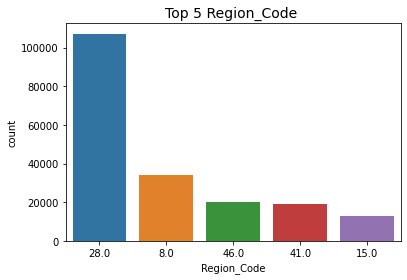

In [194]:
#Top 5 Region_Code
sns.countplot(x = 'Region_Code',data=df, order=df.Region_Code.value_counts().iloc[:5].index)
plt.title('Top 5 Region_Code ', fontsize=14) 

In [195]:
#Encoding Categorical Features
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [196]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7.0,1,2630.0,152.0,16,1,1,0,0
1,42,1,28.0,0,43327.0,26.0,135,1,0,0,1
2,66,1,33.0,0,35841.0,124.0,253,0,0,0,1
3,22,1,33.0,0,27645.0,152.0,69,0,1,0,0
4,28,1,46.0,1,29023.0,152.0,211,1,1,0,0


In [197]:
#Splitting data set to training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [198]:
#Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [199]:
#Oversample minority class
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

In [200]:
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [201]:
y_train.value_counts()

0    223800
1     43707
Name: Response, dtype: int64

In [202]:
upsampled['Response'].value_counts()

0.0    223800
1.0    223800
Name: Response, dtype: int64

Text(0, 0.5, 'count')

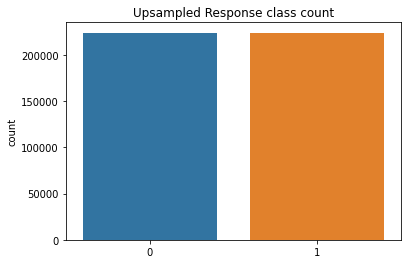

In [203]:
#Visualisation of Target of Oversampled minority class
y1=upsampled.Response.value_counts()
sns.barplot(y=y1,x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

In [204]:
#Undersample majority class
df['Response'].value_counts()

0    319553
1     62601
Name: Response, dtype: int64

In [205]:
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [206]:
downsampled['Response'].value_counts()

0.0    43707
1.0    43707
Name: Response, dtype: int64

Text(0, 0.5, 'count')

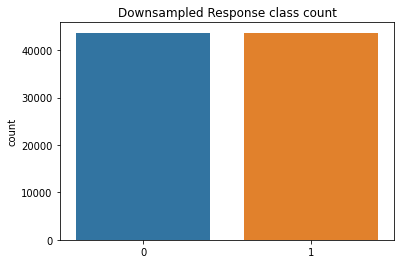

In [207]:
y2=downsampled.Response.value_counts()
sns.barplot(y=y2,x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')

In [208]:
#SMOTE model building
classifier = RandomForestClassifier #we will use the Random Forest classifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

In [209]:
smote_pipeline

Pipeline(steps=[('smote', SMOTE(random_state=4)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [210]:
smote_model = smote_pipeline.fit(X_train, y_train)

In [211]:
y_train.shape

(267507,)

In [212]:
smote_prediction = smote_model.predict(X_test)

In [213]:
#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_resample(X, y)

print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 319553, 1: 62601})
SMOTE data distribution: Counter({0: 319553, 1: 319553})


In [214]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
cm  = confusion_matrix(y_test, smote_prediction)
print(cm)

Confusion Matrix: 
[[83951 11802]
 [ 7878 11016]]


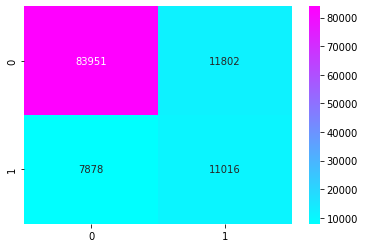

In [215]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()

In [216]:
print('Test Accuracy is  : ', (metrics.accuracy_score(y_test, smote_prediction))) 

Test Accuracy is  :  0.8283426517920225


In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [218]:
fin=accuracy_score(y_test,y_pred)
fin

0.8304273116610116

In [219]:
print(knn.score(X_train,y_train))

0.8765565013251989


In [220]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[87880  7873]
 [11568  7326]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     95753
           1       0.48      0.39      0.43     18894

    accuracy                           0.83    114647
   macro avg       0.68      0.65      0.67    114647
weighted avg       0.82      0.83      0.82    114647



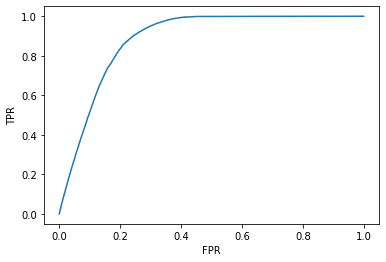

In [221]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [222]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,n_jobs=-1,min_samples_leaf=0.01)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8351984788088654


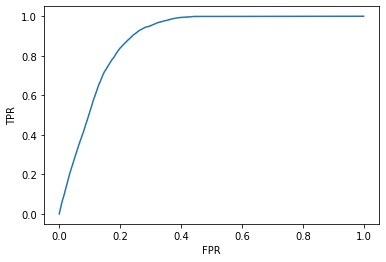

In [223]:
from sklearn.metrics import roc_curve
y_pred_proba=rf.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [224]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[95753     0]
 [18894     0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     95753
           1       0.00      0.00      0.00     18894

    accuracy                           0.84    114647
   macro avg       0.42      0.50      0.46    114647
weighted avg       0.70      0.84      0.76    114647



In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
lr=LogisticRegression()
dt=DecisionTreeClassifier(max_depth=10)
classifiers=[('Logistic Regression',lr),('CART',dt)]

In [226]:
for clf_name,clf in classifiers:
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print(clf_name,accuracy_score(y_test,y_pred))
    print(f'Train Accuracy:{clf.score(X_train,y_train)}')

Logistic Regression 0.8351112545465647
Train Accuracy:0.8349688045546472
CART 0.841016337104329
Train Accuracy:0.8455180612096133


In [227]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4298895874386163

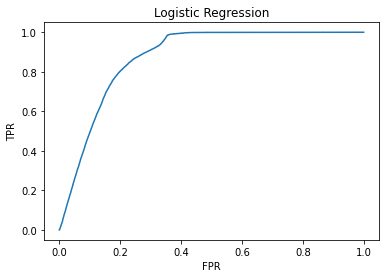

AUC SCORE:0.8744303934670504
F1 Score: 0.4298895874386163


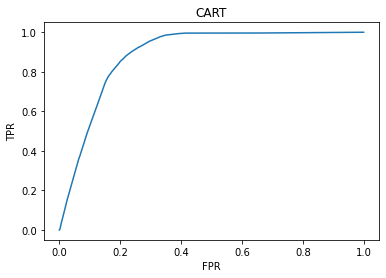

AUC SCORE:0.8869065418772442
F1 Score: 0.4298895874386163


In [228]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
for clf_name,clf in classifiers:
    y_pred_proba=clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
    plt.plot(fpr,tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(clf_name)
    plt.show()
    print(f'AUC SCORE:{roc_auc_score(y_test,y_pred_proba)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')